Autor: Gabriel de Sousa Botelho

Formação: Cientista da Computação pela UFC

Contato:
  
  📧 gabrielsbotelho12@gmail.com
  
  👉 [LinkedIn](https://www.linkedin.com/in/gabriel-botelhoo/)
  
  👉 [Github](https://github.com/GabrielSBotelho)


# Projeto de Árvore de Decisão de Classificação

* Objetivo: Avaliar o dataset e a partir de seus dados criar um modelo de árvore de decisão de classificação.

* Objetivos Específicos:
  
  1. Importar e tratar base de dados
  2. Avaliar melhor valor da parâmetro *'min_sample_leaf'* baseado na métrica *accuracy_score*
  3. Criar modelo de ávore de decisão de classificação
  4. Avaliar desempenho

Os dados utilizados neste projeto podem ser encontrados [aqui](https://www.kaggle.com/yasserh/wine-quality-dataset).

## Importando os dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '/content/drive/MyDrive/Data Science/Dados/Wine/WineQT.csv'
dataframe = pd.read_csv(path)

In [3]:
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
dataframe.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
# Excluindo coluna que não será necessária
data = dataframe.drop(columns=['Id'])
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


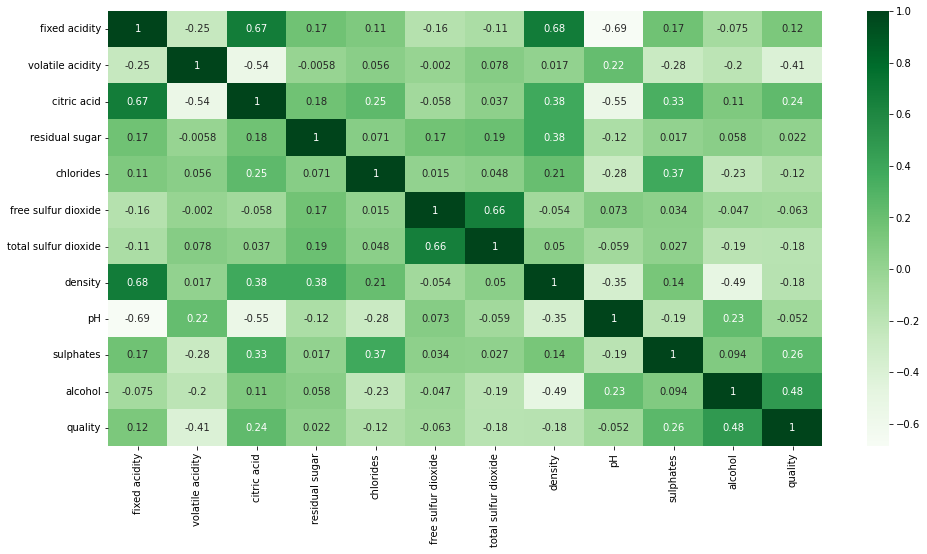

In [8]:
# Heatmap da correlação dos atributos do dataset
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot = True, cmap = 'Greens')

plt.show()

In [9]:
data['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

## Modelo de árvore de decisão de classificação

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

In [11]:
# Dividindo os dados independentes e o target
X = data.drop(columns=['quality'], axis=1)
y = data['quality']

print(X.shape, y.shape)

(1143, 11) (1143,)


In [12]:
# Dividir os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
#  Avaliar o melhor número de samples numa folha baseado na acurácia
acc_variance = []
for t in range(1,20):
  model = DecisionTreeClassifier(min_samples_leaf=t, random_state=0)
  model.fit(x_train, y_train)
  p = model.predict(x_test)
  accs = accuracy_score(y_test, p)
  acc_variance.append(accs)

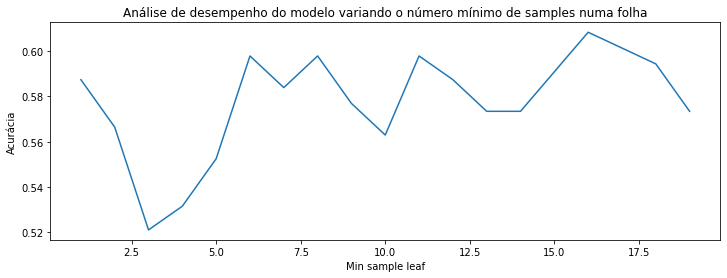

In [14]:
plt.figure(figsize=(12,4))
plt.plot(range(1,20), acc_variance)
plt.title('Análise de desempenho do modelo variando o número mínimo de samples numa folha')
plt.xlabel('Min sample leaf')
plt.ylabel('Acurácia')
plt.show()

In [15]:
# Criando modelo
tree = DecisionTreeClassifier(min_samples_leaf=16, random_state=0)
tree.fit(x_train, y_train) 

DecisionTreeClassifier(min_samples_leaf=16, random_state=0)

In [16]:
# Predição dos valores
pred = tree.predict(x_test)
print(pred)

[5 6 5 6 5 6 5 5 6 6 5 5 6 5 7 5 6 6 5 5 6 5 5 5 5 5 6 5 5 6 5 5 6 6 5 6 6
 6 5 6 5 6 5 7 5 5 5 7 7 6 5 7 5 6 6 6 5 5 5 6 6 5 6 6 5 5 7 5 5 6 5 5 5 7
 6 7 7 6 6 6 5 6 6 6 6 5 6 5 5 6 7 7 5 5 5 6 5 5 5 5 5 5 7 5 5 6 5 7 5 5 5
 5 5 6 5 6 5 7 5 7 6 5 5 7 6 5 6 7 5 5 7 6 5 5 5 6 5 7 5 5 6 6 6 7 5 5 6 7
 7 5 5 6 6 6 5 5 5 7 6 6 6 7 5 5 5 7 6 7 7 5 5 5 5 6 6 6 6 5 5 6 5 5 6 5 5
 5 5 5 5 6 6 6 5 6 7 5 5 6 6 5 7 7 5 6 6 7 5 5 5 5 7 6 6 7 5 5 6 6 5 6 6 6
 6 5 6 6 7 5 5 6 6 6 5 6 6 6 7 6 5 5 7 6 6 7 6 5 6 5 7 6 5 6 5 5 7 6 5 6 6
 5 5 5 5 5 5 5 6 5 6 6 6 5 5 5 5 6 6 6 7 5 6 5 5 6 7 5]


In [17]:
acc = accuracy_score(y_test, pred)
print(f'Acurácia do modelo é de {acc*100:.2f}%')

Acurácia do modelo é de 60.84%


In [18]:
mse = mean_squared_error(y_test, pred)
print(f'O erro quadrático médio do modelo é de {np.sqrt(mse)*100:.2f}%')

O erro quadrático médio do modelo é de 68.19%


In [19]:
cvs = cross_val_score(tree, x_train, y_train, cv=4)
print(f'A média do score obtido na validação cruzada é de {np.mean(cvs)*100:.2f}%')

A média do score obtido na validação cruzada é de 55.90%


[Text(0.5711436170212766, 0.9444444444444444, 'alcohol <= 10.525\ngini = 0.646\nsamples = 857\nvalue = [5, 26, 359, 344, 109, 14]'),
 Text(0.386968085106383, 0.8333333333333334, 'sulphates <= 0.625\ngini = 0.552\nsamples = 519\nvalue = [5, 16, 295, 182, 19, 2]'),
 Text(0.2526595744680851, 0.7222222222222222, 'total sulfur dioxide <= 98.5\ngini = 0.465\nsamples = 322\nvalue = [3, 12, 219, 86, 2, 0]'),
 Text(0.17553191489361702, 0.6111111111111112, 'sulphates <= 0.525\ngini = 0.503\nsamples = 276\nvalue = [3, 12, 175, 84, 2, 0]'),
 Text(0.0851063829787234, 0.5, 'chlorides <= 0.082\ngini = 0.41\nsamples = 84\nvalue = [1, 7, 63, 12, 1, 0]'),
 Text(0.0425531914893617, 0.3888888888888889, 'alcohol <= 9.65\ngini = 0.545\nsamples = 42\nvalue = [0, 5, 26, 10, 1, 0]'),
 Text(0.02127659574468085, 0.2777777777777778, 'gini = 0.381\nsamples = 21\nvalue = [0, 4, 16, 1, 0, 0]'),
 Text(0.06382978723404255, 0.2777777777777778, 'gini = 0.585\nsamples = 21\nvalue = [0, 1, 10, 9, 1, 0]'),
 Text(0.12765957

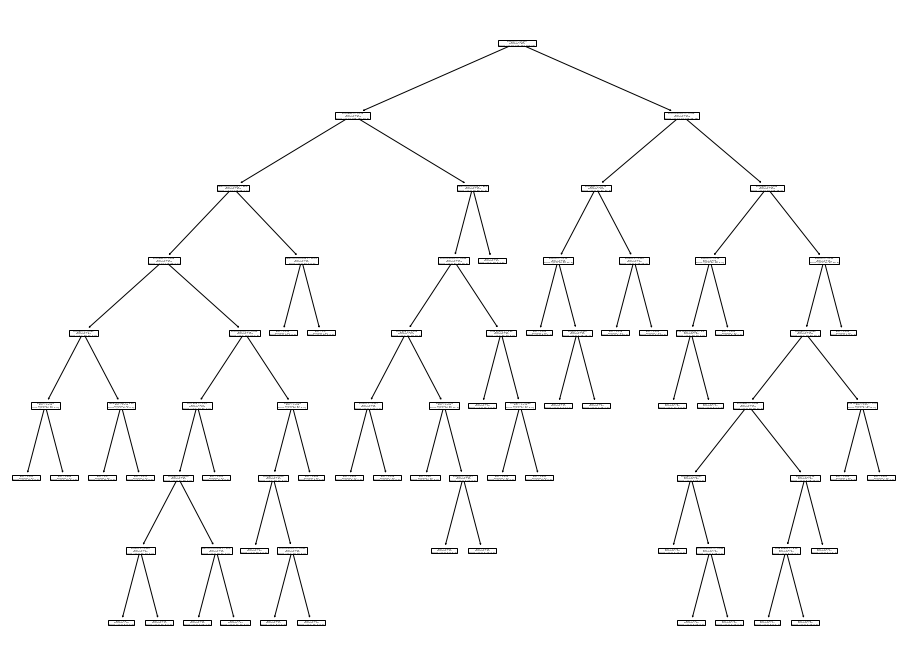

In [20]:
plt.figure(figsize=(16,12))
plot_tree(tree, feature_names=X.columns)